In [1]:
import numpy as np
import pandas as pd

In [2]:
# !wget 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Exploratory Data Analysis

In [5]:
# make column pattern align
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
df.columns.str.lower().str.replace(' ', '_')

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
df.dtypes #check datatype for each column

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
df.dtypes[ df.dtypes == 'object'] # which columns are string

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [10]:
df.dtypes[ df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [11]:
strings = list(df.dtypes[ df.dtypes == 'object'].index)

In [12]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [13]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [14]:
for col in df.columns:
    print(col)
    print(df[col].head())
    print('_________')

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object
_________
model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object
_________
year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64
_________
engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object
_________
engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64
_________
engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64
_________
transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object
_________
driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Na

In [15]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print('_________')

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
_________
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
_________
year
[2011 2012 2013 1992 1993]
_________
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
_________
engine_hp
[335. 300. 230. 320. 172.]
_________
engine_cylinders
[ 6.  4.  5.  8. 12.]
_________
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
_________
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
_________
number_of_doors
[ 2.  4.  3. nan]
_________
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
_________
vehicle_size
['compact' 'midsize' 'large']
_________
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
_________
highway_mpg
[26 28 27 25 24]
_________
city_mpg
[19 20 18 17 16

In [16]:
for col in df.columns: #how many unique values are in each col
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print('_________')

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
_________
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
_________
year
[2011 2012 2013 1992 1993]
28
_________
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
_________
engine_hp
[335. 300. 230. 320. 172.]
356
_________
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
_________
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
_________
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
_________
number_of_doors
[ 2.  4.  3. nan]
3
_________
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
_________
vehicle_size
['compact' 'midsize' 'large']
3
_________
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
_________
highway_mpg
[26 28 27 25 24]
5

In [17]:
# see the price distribution
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

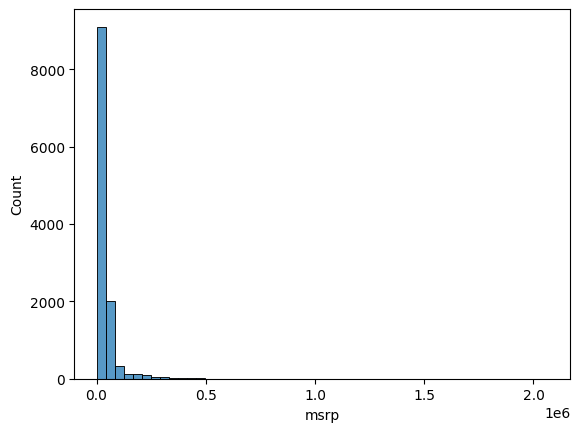

In [18]:
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

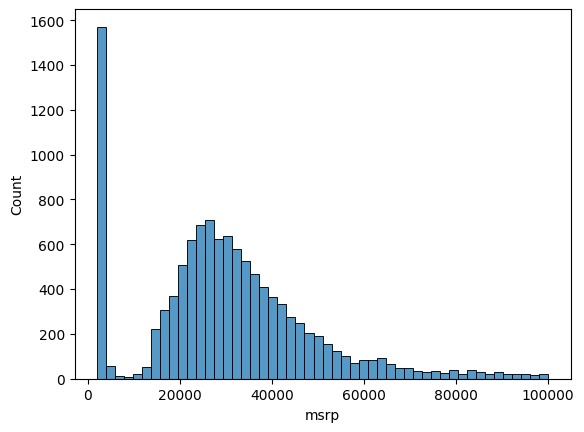

In [19]:
#zoom in. Check distribution of cars that cost less than $100,000
sns.histplot(df.msrp[df['msrp'] < 100000], bins=50)

In [20]:
#scale the price to get a compact range, using log transform
#when using log, we can add 1 to all the values, to escape the log0 error
np.log(1000), np.log(1000 + 1), np.log1p(1000)

(np.float64(6.907755278982137),
 np.float64(6.90875477931522),
 np.float64(6.90875477931522))

<Axes: xlabel='msrp', ylabel='Count'>

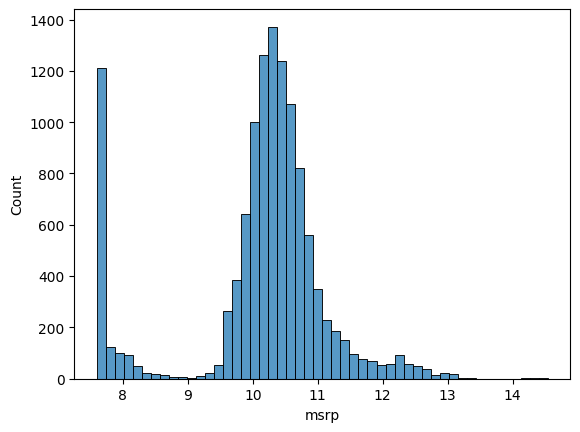

In [21]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)

In [22]:
#df.msrp = price_logs


In [23]:
df.isnull().sum() #check how many missing values in each col

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up the Validation Framework

In [24]:
n = len(df) #total humber of rows in the data

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_test - n_val

In [25]:
n_test, n_val, n_train 

(2382, 2382, 7150)

In [26]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]
#data won't be shuffled this way

In [27]:
# we coud reshuffle the whole data itself before splitting
#gen a sequence of number
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [28]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_val+n_train]]
df_test = df.iloc[idx[n_val+n_train:]]


In [29]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [30]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [31]:
#reset the index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [32]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [33]:
# remove "y" from the test data
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [34]:
df_train.head() #confirm if it has been deleted

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [35]:
len(y_train)

7150

## Linear Regression

In [36]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [37]:
xi = [435, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [38]:
def linear_regression(xi):

    n = len(xi)
    pred = w0

    for j in range(n):
        pred = pred + w[j]*xi[j]

    return pred

In [39]:
linear_regression(xi)

12.132

In [40]:
np.expm1(12.132) #transform back the price

np.float64(185719.84648882892)

## Linear Regression Vector Form

In [41]:
def dot(xi, w):
    n= len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [42]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [43]:
w_new = [w0] + w

In [44]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [45]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [46]:
linear_regression(xi)

12.132

In [47]:
xi = [435, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [48]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]
X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [49]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [50]:
def linear_regression(X):
    return X.dot(w_new) 

In [51]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## Training a Linear Regression Model

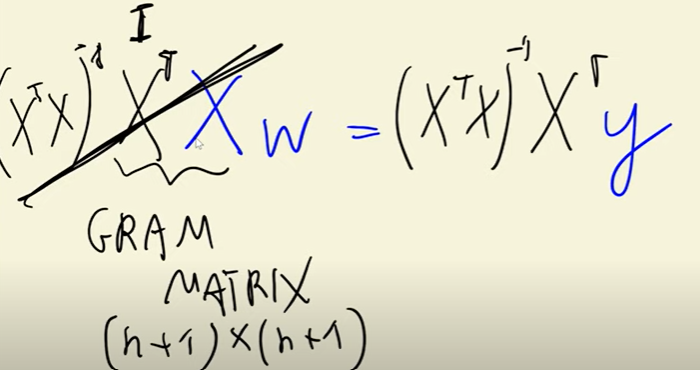

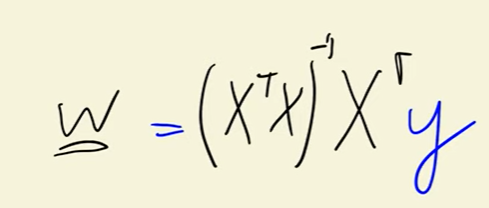

- `w` is not an approximate solution, because the original solution does not exist. Since the inverse of X won't exist, because it will not be a square matrix

In [52]:
def train_linear_regression(X, y):
    pass

In [53]:

X = [
   [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X) #no bias term in this case
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [54]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [55]:
XTX = X.T.dot(X) #gram matrix

In [56]:
XTX_inv = np.linalg.inv(XTX)

In [57]:
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [58]:
w = XTX_inv.dot(X.T).dot(y)

In [59]:
# add bias term
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [60]:
X = np.column_stack([ones, X])

In [61]:
XTX = X.T.dot(X) #gram matrix

In [62]:
XTX_inv = np.linalg.inv(XTX)
XTX.dot(XTX_inv).round(1) #confirm if it's an identity matrix

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

In [63]:
w_full = XTX_inv.dot(X.T).dot(y)

In [64]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [65]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(np.float64(300.0677669255554), array([-0.22774253, -2.5769413 , -0.02301206]))

In [66]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])

    X = np.column_stack([ones, X])
    XTX = X.T.dot(X) #gram matrix
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

## Car Price Baseline Model

In [67]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [68]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,335.0,6.0,26,19,3916
1,300.0,6.0,28,19,3916
2,300.0,6.0,28,20,3916
3,230.0,6.0,28,18,3916
4,230.0,6.0,28,18,3916
...,...,...,...,...,...
11909,300.0,6.0,23,16,204
11910,300.0,6.0,23,16,204
11911,300.0,6.0,23,16,204
11912,300.0,6.0,23,16,204


In [69]:
X = df_train[base].values

In [70]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [71]:
train_linear_regression(X, y_train)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

In [72]:
# check mising values
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [73]:
df_train[base] = df_train[base].fillna(0)
df_train[base].isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [74]:
X_train = df_train[base].values

In [75]:
w0, w = train_linear_regression(X_train, y_train)

In [76]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

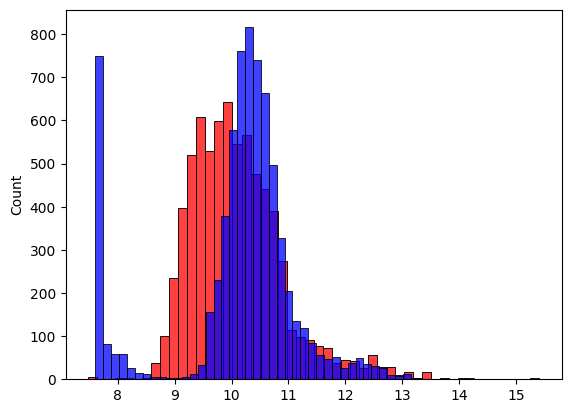

In [77]:

sns.histplot(y_pred, color = 'red', bins = 50)
sns.histplot(y_train, color = 'blue', bins = 50)

- From the plot, it is clear the model is not ideal

## RMSE

In [78]:
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [79]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

# Validating the Model

In [80]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [81]:
def prepare_X(df):
    # function to prepare the features
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [82]:
X_train = prepare_X(df_train) #prepare the train features
w0, w = train_linear_regression(X_train, y_train) # train the model

X_val = prepare_X(df_val) # prepare the val dataset
y_pred = w0 + X_val.dot(w) # predict validation targets

rmse(y_val, y_pred)

np.float64(0.761653099130156)

## Simple Feature Engineering

In [83]:
df_train.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [84]:
# we want to add the age of the car as an input feature
def prepare_X(df):
    # function to prepare the features

    df = df.copy() # take a copy so the original df does not change 
    df['age'] = df.year.max() - df.year # determine the age of each car

    features = base + ['age'] # add age to the feature list
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [85]:
X_train = prepare_X(df_train)

In [86]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [87]:
X_train = prepare_X(df_train) #prepare the train features
w0, w = train_linear_regression(X_train, y_train) # train the model

X_val = prepare_X(df_val) # prepare the val dataset
y_pred = w0 + X_val.dot(w) # predict validation targets

rmse(y_val, y_pred) # the rmse has reduced

np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

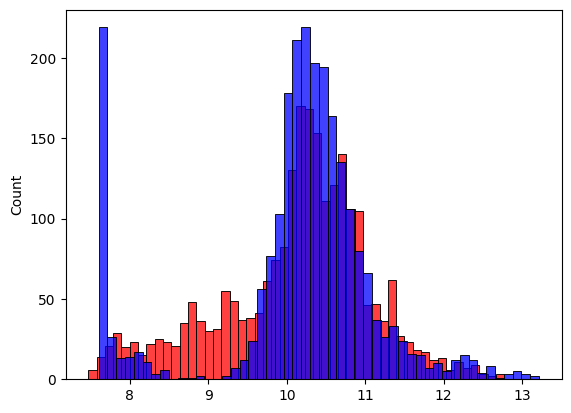

In [88]:
sns.histplot(y_pred, color = 'red', bins = 50)
sns.histplot(y_val, color = 'blue', bins = 50)

## Categorical Variables

In [89]:
df_train.dtypes # all "object" are categorical variables

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [90]:
df_train.number_of_doors # actually a categorical variable not numerical, because the cars with these doors are distinct

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [91]:
'num_doors_%s' %3

'num_doors_3'

In [92]:
#code to do one hot encoding for the number of doors
# for v in [2, 3, 4]:
#     df_train['num_doors_%s' %v] = (df_train.number_of_doors == v).astype('int')

In [93]:
# we want to add the age of the car as an input feature
def prepare_X(df):
    # function to prepare the features

    df = df.copy() # take a copy so the original df does not change 
    df['age'] = df.year.max() - df.year # determine the age of each car

    features = base + ['age'] # add age to the feature list

    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)

    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [94]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]], shape=(7150, 9))

In [95]:
X_train = prepare_X(df_train) #prepare the train features
w0, w = train_linear_regression(X_train, y_train) # train the model

X_val = prepare_X(df_val) # prepare the val dataset
y_pred = w0 + X_val.dot(w) # predict validation targets

rmse(y_val, y_pred) # the rmse has reduced

np.float64(0.515799564150169)

<Axes: ylabel='Count'>

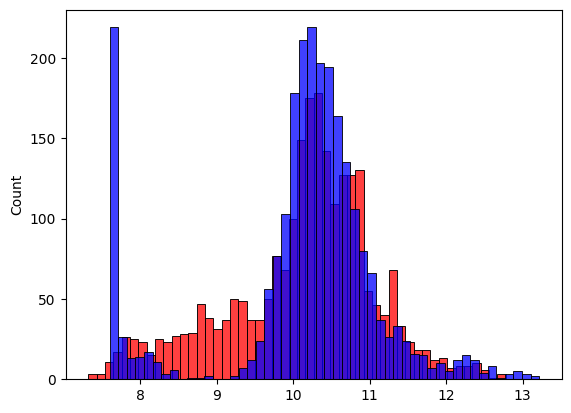

In [96]:
sns.histplot(y_pred, color = 'red', bins = 50)
sns.histplot(y_val, color = 'blue', bins = 50)

- The improvement is not much, which shows the number of dooes is not an important feature

In [97]:
# Include the make of cars as features
# check the maker of cars that are the top 5
df.make.value_counts().head()

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [98]:
# convert the make to list
list(df.make.value_counts().head().index)

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [99]:
makes = list(df.make.value_counts().head().index)

In [100]:
# we want to add the age of the car as an input feature
def prepare_X(df):
    # function to prepare the features

    df = df.copy() # take a copy so the original df does not change 
    df['age'] = df.year.max() - df.year # determine the age of each car

    features = base + ['age'] # add age to the feature list

    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)

    for m in makes:
        df['make_%s' %m] = (df.make == m).astype('int')
        features.append('make_%s' %m)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [101]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   0.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   1.,   0.],
       [148.,   4.,  37., ...,   0.,   0.,   0.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   0.],
       [563.,  12.,  21., ...,   0.,   0.,   0.],
       [200.,   4.,  31., ...,   1.,   0.,   0.]], shape=(7150, 14))

In [102]:
X_train = prepare_X(df_train) #prepare the train features
w0, w = train_linear_regression(X_train, y_train) # train the model

X_val = prepare_X(df_val) # prepare the val dataset
y_pred = w0 + X_val.dot(w) # predict validation targets

rmse(y_val, y_pred) # the rmse has reduced

np.float64(0.5076038849556795)

In [122]:
categorical_ = list(df_train.dtypes[df_train.dtypes == 'object'].index)

In [126]:
categorical_.remove('model')

In [127]:
categorical_

['make',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [132]:
categories = {}

for c in categorical_:
    categories[c] = list(df[c].value_counts().head().index)


In [133]:
categories 

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [134]:
# we want to add the age of the car as an input feature
def prepare_X(df):
    # function to prepare the features

    df = df.copy() # take a copy so the original df does not change 
    df['age'] = df.year.max() - df.year # determine the age of each car

    features = base + ['age'] # add age to the feature list

    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' %(c, v))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [135]:
X_train = prepare_X(df_train) #prepare the train features
w0, w = train_linear_regression(X_train, y_train) # train the model

X_val = prepare_X(df_val) # prepare the val dataset
y_pred = w0 + X_val.dot(w) # predict validation targets

rmse(y_val, y_pred) # the rmse has reduced

np.float64(23.019020704791835)

In [136]:
w0

np.float64(4011091003551887.0)

- The results are very poor. This is because in the gram matrix, we may have feature columns that are the same, which makes the inverse not to exist.

## Regularization

In [ ]:
# let's see an example where columns are repeated
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5]

]
X = np.array (X)

In [140]:
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [141]:
# find inverse
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [ ]:
# add a very small number to the one of the elements in duplicated column, it makes the matirx invertible 
# This is what happened in our case above
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000000001]

]
X = np.array (X)

XTX = X.T.dot(X)
XTX

np.linalg.inv(XTX)

array([[ 3.85852104e-02, -3.09242857e+02,  3.09207143e+02],
       [-3.09250483e+02,  7.03687442e+13, -7.03687442e+13],
       [ 3.09210826e+02, -7.03687442e+13,  7.03687442e+13]])

In [143]:
# let's create a y, and see how the parameters of the model look like
y = [1, 2, 3, 1, 2, 3]

XTX_inv = np.linalg.inv(XTX)
XTX_inv.dot(X.T).dot(y)

array([ 5.17914730e-01, -8.82187500e+03,  8.82178906e+03])

- We can solve the problem by adding a small number to the diagonal of the matrix

In [145]:
XTX = [
    [1, 2, 2],
    [2, 1, 1],
    [2, 1, 1]
]

In [146]:
XTX = XTX + 0.01 * np.eye(3)

In [147]:
np.linalg.inv(XTX)

array([[ -0.33668906,   0.33501399,   0.33501399],
       [  0.33501399,  49.91540897, -50.08459103],
       [  0.33501399, -50.08459103,  49.91540897]])

In [148]:
def train_linear_regression_regularized(X, y, r=0.001):
    ones = np.ones(X.shape[0])

    X = np.column_stack([ones, X])
    XTX = X.T.dot(X) #gram matrix

    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [149]:
X_train = prepare_X(df_train) #prepare the train features
w0, w = train_linear_regression_regularized(X_train, y_train, r=0.01) # train the model

X_val = prepare_X(df_val) # prepare the val dataset
y_pred = w0 + X_val.dot(w) # predict validation targets

rmse(y_val, y_pred) # the rmse has reduced

np.float64(0.45652199012897743)

- `r` is a hyperparameter that can be optimized

## Tuning the Model

In [153]:
for n in range(10):
    print(10^n)

10
11
8
9
14
15
12
13
2
3


In [169]:
r_range = [10/(10**(n)) for n in range(6)]
r_range.append(0) 
r_range

[10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 0]

In [170]:
for k in r_range:
    X_train = prepare_X(df_train) #prepare the train features
    w0, w = train_linear_regression_regularized(X_train, y_train, r=k) # train the model

    X_val = prepare_X(df_val) # prepare the val dataset
    y_pred = w0 + X_val.dot(w) # predict validation targets

    score = rmse(y_val, y_pred) # the rmse has reduced
    print(k, w0, score)

10.0 4.283980108968471 0.4701456932099909
1.0 5.634896668066369 0.45722043179930605
0.1 6.1912087238544915 0.4565692763007501
0.01 6.2766071476973995 0.45652199012897743
0.001 6.285636717989048 0.45651750867781377
0.0001 6.317246071243372 0.4565170654323052
0 4011091003551887.0 23.019020704791835


In [175]:
np.expm1(0.47)

np.float64(0.5999941932173602)

## Using the Model

In [176]:
# combine the train and val datasets
df_full_train = pd.concat([df_train, df_val])

In [177]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [178]:
X_full_train = prepare_X(df_full_train)

In [180]:
y_full_train = np.concatenate([y_train, y_val])

In [ ]:
w0, w = train_linear_regression_regularized(X_train, y_train, r=0.001) # train the model

In [182]:
X_test = prepare_X(df_test) # prepare the test dataset
y_pred = w0 + X_test.dot(w) # predict validation targets

score = rmse(y_test, y_pred) 
print(score)

0.4522284724096582


In [185]:
car = df_test.iloc[20].to_dict() # pretend the data is from a user in dict
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [188]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [190]:
X_small = prepare_X(df_small)

In [ ]:
y_pred = w0 + X_small.dot(w) # predict validation targets

In [192]:
y_pred

array([10.6352693])

In [193]:
np.expm1(y_pred)

array([41574.62337439])

In [195]:
y_test[20]

np.float64(10.463131911491967)

In [196]:
# original value of y
np.expm1(y_test[20])

np.float64(35000.00000000001)